In [8]:
import torch

In [9]:
x = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

In [10]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [12]:
X = X.to(device)
Y = Y.to(device)

In [13]:
import torch.nn as nn

In [21]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)

    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)

        return x
        

In [22]:
mynet = MyNeuralNet().to(device)

In [23]:
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[ 0.3374, -0.1771],
        [ 0.6496,  0.4558],
        [-0.4754, -0.0462],
        [-0.5500,  0.2751],
        [ 0.0372, -0.1998],
        [ 0.2740, -0.6866],
        [ 0.5293,  0.3044],
        [-0.6055,  0.6524]], device='cuda:0', requires_grad=True)

In [24]:
mynet.parameters()

<generator object Module.parameters at 0x7f3537c92180>

In [25]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[ 0.3374, -0.1771],
        [ 0.6496,  0.4558],
        [-0.4754, -0.0462],
        [-0.5500,  0.2751],
        [ 0.0372, -0.1998],
        [ 0.2740, -0.6866],
        [ 0.5293,  0.3044],
        [-0.6055,  0.6524]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.4520, -0.3818,  0.4649, -0.4415, -0.1117,  0.5117, -0.6331,  0.3944],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.0794, -0.1225,  0.2995, -0.1487, -0.2704,  0.2485,  0.2991,  0.0199]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0432], device='cuda:0', requires_grad=True)


In [26]:
loss_func = nn.MSELoss()

In [27]:
_Y = mynet(X)

In [28]:
loss_value = loss_func(_Y, Y)

In [29]:
print(loss_value)

tensor(93.2919, device='cuda:0', grad_fn=<MseLossBackward0>)


In [30]:
from torch.optim import SGD

In [31]:
opt = SGD(mynet.parameters(), lr = 0.001)

In [44]:
loss_history = []

for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X), Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.detach().cpu().numpy())

In [45]:
import matplotlib.pyplot as plt

In [46]:
%matplotlib inline

Text(0, 0.5, 'loss value')

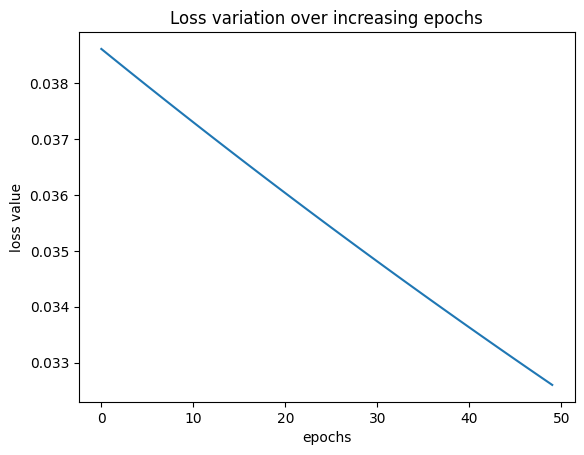

In [47]:
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [48]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [49]:
x = [[3, 5], [7, 9], [1, 9], [5, 9], [2, 10]]
y = [[8], [16], [10], [14], [12]]

In [50]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [51]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [52]:
X = X.to(device)
Y = Y.to(device)

In [53]:
for X_i in X:
    print(mynet(X_i))

tensor([7.9306], device='cuda:0', grad_fn=<AddBackward0>)
tensor([16.2238], device='cuda:0', grad_fn=<AddBackward0>)
tensor([10.0620], device='cuda:0', grad_fn=<AddBackward0>)
tensor([14.2434], device='cuda:0', grad_fn=<AddBackward0>)
tensor([12.1762], device='cuda:0', grad_fn=<AddBackward0>)
